# Function Notebook

## Introduction
This notebook is designed to be a flexible and expandable template for developing and documenting functions for various tasks.

## Next Steps 
- Data Reduction ------done
- Feature Selection -----done
- Dimensionality Reduction ------done
- Binning / Encoding-------done
- Feature Engineering-------done
- Text Handling
- Data Validation


## NOTE : This is still in progress 

## Table of Contents
1. [Configuration and Setup](#Configuration-and-Setpu)
2. [API Get Dataset no key](#Get-Data-No-ApiKey)
3. [Pre-Processing Functions](#Pre-Processing-Functions)
    - [Dealing with NULL Values (#Finding Missing Data Count )](Dealing-with-NULL-Values-(-Finding-Missing-Data-Count-))
    - [Remove(drop), mean , median , mode](#Remove(drop),-mean-,-median-,-mode)
    - [Data Combining / Intergration](#Data-Combining-/-Intergration)
    - [Normalizing / Feature Scaling](#Normalizing-/-Feature-Scaling)
    - [Data Reduction (PCA)](#data-reduction-pca)
    - [Encoding](#encoding)
4. [Everything Maps](#Everything-Maps)
    - [Extracting Coordinates](#Extracting-Coordinates)
    - [Point to point distance calculator minimum](#Point-to-point-distance-calculator-minimum-(-Thomas-))
    - [Point to point distance calculator maximum](#Point-to-point-distance-calculator-maximum)


## Configuration and Setup
Set up the environment with necessary libraries and configurations, Make sure you have all libraries installed under functions 

In [17]:
###################################################################
# Libraries used:
###################################################################
import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import requests
import math
import tensorflow as tf
from io import StringIO
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler,PowerTransformer,MaxAbsScaler
from sklearn.preprocessing import RobustScaler,Normalizer,QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from haversine import haversine
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tkinter as tk
from tkinter import messagebox
from sklearn.decomposition import PCA

## Get Data No ApiKey

In [18]:
def API_Unlimited(datasetname): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))


"""
Get unlimited data from the API Function 

Parameters:
datasetname (string): dataset name as from city of melbourn 
apikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)

f = open("API.txt","r")
api_key = f.read()

Returns:
Csv : Returns the csv dataset of the dataset name 
"""


'\nGet unlimited data from the API Function \n\nParameters:\ndatasetname (string): dataset name as from city of melbourn \napikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)\n\nf = open("API.txt","r")\napi_key = f.read()\n\nReturns:\nCsv : Returns the csv dataset of the dataset name \n'

#### Testing :

In [19]:
dataset_id_1 = 'litter-traps'
dataset_id_2 = 'public-barbecues'
dataset_id_3 = 'cafes-and-restaurants-with-seating-capacity'
dataset_id_4 = 'argyle-square-air-quality'
litter_df = API_Unlimited(dataset_id_1)
bbq_df = API_Unlimited(dataset_id_2)
cafe_df = API_Unlimited(dataset_id_3)
AirQuality_df = API_Unlimited(dataset_id_4)

    asset_number                                  asset_description  \
34       1378100               SWD Litter Trap - Y25B - Bouverie St   
61       1426532                  SWD Litter Trap - Fitzroy Gardens   
24       1126516         SWD Litter Trap - Clarendon St, west trunk   
52       1126518                        SWD Litter Trap - Therry St   
35       1126526                         SWD Litter Trap - Henry St   
46       1378102                SWD Litter Trap - MP13B - Bayles St   
15       1378312  SWD Litter Trap - West side Wurundjeri Way, cn...   
55       1379349  SWD Litter Trap - Rakaia Way North cnr Docklan...   
62       1378105  SWD Litter Trap - Pearl River Road Sedimentati...   
9        1126517  SWD Litter Trap - Lauren St (between Arden St ...   

   construct_material_lupvalue inspection_frequency      maintained_by  \
34            Precast Concrete            Quarterly  City of Melbourne   
61            Precast Concrete            Quarterly  City of Melbourne

# Pre-Processing Functions

## Dealing with NULL Values ( Finding Missing Data Count )

In [20]:
def FindMissingVal(df):
  #now lets have a array to store the feature with number of NAN values
  MissingFeaturenValues = []
  #now we check each column
  for column in df.columns:
    missingVals = np.sum(df[column].isnull()) # sum the number of NAN values into variable
    MissingFeaturenValues.append({'Feature':column ,'Number of Missing Values':missingVals}) #the array consist of dictionary with feature and its missing values
  return MissingFeaturenValues

"""
Function to get column names with count of missing values 

Parameters:
datasetname (string): dataset name as from city of melbourn 
apikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)

f = open("API.txt","r")
api_key = f.read()

Returns:
Csv : Returns the csv dataset of the dataset name 
"""

'\nFunction to get column names with count of missing values \n\nParameters:\ndatasetname (string): dataset name as from city of melbourn \napikey (string): the current api Key ( this should be gotton via the below if api stored in current workspace / google drive ( refer to Te API)\n\nf = open("API.txt","r")\napi_key = f.read()\n\nReturns:\nCsv : Returns the csv dataset of the dataset name \n'

In [21]:
FindMissingVal(litter_df)

[{'Feature': 'asset_number', 'Number of Missing Values': 0},
 {'Feature': 'asset_description', 'Number of Missing Values': 0},
 {'Feature': 'construct_material_lupvalue', 'Number of Missing Values': 7},
 {'Feature': 'inspection_frequency', 'Number of Missing Values': 5},
 {'Feature': 'maintained_by', 'Number of Missing Values': 0},
 {'Feature': 'object_type_lupvalue', 'Number of Missing Values': 4},
 {'Feature': 'lat', 'Number of Missing Values': 0},
 {'Feature': 'lon', 'Number of Missing Values': 0},
 {'Feature': 'location', 'Number of Missing Values': 0}]

### Remove(drop), mean , median , mode 

In [22]:


def handle_null_values(dataset, columns, action): # nested conditions
    if action == 'remove':
        modified_dataset = dataset.dropna(subset=columns)
    elif action in ['mean', 'median', 'mode']:
        for column in columns:
            if dataset[column].isnull().any():  
                if action == 'mean':
                    fill_value = dataset[column].mean()
                elif action == 'median':
                    fill_value = dataset[column].median()
                elif action == 'mode':
                    fill_value = dataset[column].mode()[0]
                dataset[column] = dataset[column].fillna(fill_value)
        modified_dataset = dataset
    else:
        raise ValueError("Action must be 'remove', 'mean', 'median', or 'mode'")
    return modified_dataset

"""
Handling Missing Values Functions

Parameters:

dataset(dataframe) -  Dataframe you want to deal null values 
columns (array) - a array of all columns you want to handle missing values for the picked action
actions (string) - 'remove' , 'mode' , 'mean' , 'median' performs the said actions when selected ( can select one at a time )

Returns:
Dataframe : Returns Dataframe including handled values
"""



"\nHandling Missing Values Functions\n\nParameters:\n\ndataset(dataframe) -  Dataframe you want to deal null values \ncolumns (array) - a array of all columns you want to handle missing values for the picked action\nactions (string) - 'remove' , 'mode' , 'mean' , 'median' performs the said actions when selected ( can select one at a time )\n\nReturns:\nDataframe : Returns Dataframe including handled values\n"

#### Testing - I made a array of all columns i want to use mode on and ran function , returns to a new df called modified_mode

In [23]:
"""Usage Example"""
columns=['inspection_frequency','construct_material_lupvalue']
modified_mode = handle_null_values(litter_df,columns,'mode') #<========== Pass DATASET and Prefered Method


In [24]:
FindMissingVal(modified_mode)

[{'Feature': 'asset_number', 'Number of Missing Values': 0},
 {'Feature': 'asset_description', 'Number of Missing Values': 0},
 {'Feature': 'construct_material_lupvalue', 'Number of Missing Values': 0},
 {'Feature': 'inspection_frequency', 'Number of Missing Values': 0},
 {'Feature': 'maintained_by', 'Number of Missing Values': 0},
 {'Feature': 'object_type_lupvalue', 'Number of Missing Values': 4},
 {'Feature': 'lat', 'Number of Missing Values': 0},
 {'Feature': 'lon', 'Number of Missing Values': 0},
 {'Feature': 'location', 'Number of Missing Values': 0}]

### Data Combining / Intergration

In [25]:
import pandas as pd

def Combine_Dataset(datasets, mode='outer'):
    # Check if no datset is given 
    if not datasets:
        raise ValueError("No datasets provided for merging.")
    
    #We check if there are any common columns
    common_columns = set(datasets[0].columns) # making a SET
    for dataset in datasets[1:]:
        common_columns.intersection_update(dataset.columns) #Appending if we find any matching 
        
    #Error if no common found 
    if not common_columns:
        raise ValueError("No common columns available for combining the datasets. Please give datasets with common columns.")

    #Merge
    combined_dataset = datasets[0]
    for dataset in datasets[1:]:
        combined_dataset = pd.merge(combined_dataset, dataset, how=mode, on=list(common_columns))# combine with mode ( default is outer) with the common columns
    
    return combined_dataset

"""
Combining multiple datasets

Parameters:

datasets-  Array of multiple datasets
Mode - inner , outer , left , right    (JOIN) Default : outer

Returns:
Dataframe : Returns Dataframe combined
"""


'\nCombining multiple datasets\n\nParameters:\n\ndatasets-  Array of multiple datasets\nMode - inner , outer , left , right    (JOIN) Default : outer\n\nReturns:\nDataframe : Returns Dataframe combined\n'

#### Testing - I pass a array of all datasets, i want to use mode=inner on and ran the function , returns to a new df called combinedDF

In [26]:
Datasets = [litter_df,cafe_df] # passing 2 datasets As aRRAY HERE 

combinedDF = Combine_Dataset(Datasets, mode='outer') # using mode "outer"

In [27]:
combinedDF.head(5)

,asset_number,asset_description,construct_material_lupvalue,inspection_frequency,maintained_by,object_type_lupvalue,lat,lon,location,census_year,...,building_address,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,seating_type,number_of_seats,longitude,latitude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-37.77619476202889, 144.93912821315",2013.0,...,52-62 Cade Way PARKVILLE 3052,Parkville,Corner Cafe & Convenience Store,"Shop 1, Ground , 52 Cade Way PARKVILLE 3052",4511.0,Cafes and Restaurants,Seats - Outdoor,6.0,144.939128,-37.776195
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-37.77619476202889, 144.93912821315",2013.0,...,52-62 Cade Way PARKVILLE 3052,Parkville,Corner Cafe & Convenience Store,"Shop 1, Ground , 52 Cade Way PARKVILLE 3052",4511.0,Cafes and Restaurants,Seats - Indoor,35.0,144.939128,-37.776195
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-37.776194762058005, 144.93912821305003",2010.0,...,52-62 Cade Way PARKVILLE 3052,Parkville,Corner Cafe & Convenience Store,"Unit 1, 62-0 Cade Way PARKVILLE 3052",4511.0,Cafes and Restaurants,Seats - Outdoor,6.0,144.939128,-37.776195
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-37.776194762058005, 144.93912821305003",2010.0,...,52-62 Cade Way PARKVILLE 3052,Parkville,Corner Cafe & Convenience Store,"Unit 1, 62-0 Cade Way PARKVILLE 3052",4511.0,Cafes and Restaurants,Seats - Indoor,35.0,144.939128,-37.776195
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-37.776194762090775, 144.93912821290002",2011.0,...,52-62 Cade Way PARKVILLE 3052,Parkville,Corner Cafe & Convenience Store,"Unit 1, 62-0 Cade Way PARKVILLE 3052",4511.0,Cafes and Restaurants,Seats - Outdoor,6.0,144.939128,-37.776195


### Normalizing / Feature Scaling 

In [28]:

def Scale_data(dataframe, columns, method='minmax'):

    #Copy so we dont change original dataFrame
    df_scaled = dataframe.copy()
    
    # Check if all specified columns exist in the DataFrame
    if not all(col in df_scaled.columns for col in columns):
        missing_cols = [col for col in columns if col not in df_scaled.columns]
        raise ValueError(f"Columns not found in DataFrame: {missing_cols}")
    
    # Select the normalization method nested if 
    if method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'zscore':
        scaler = StandardScaler()
    elif method == 'powertransformer':
        scaler = PowerTransformer()
    elif method == 'absscalar':
        scaler = MaxAbsScaler()
    elif method == 'robustscalar':
        scaler = RobustScaler()
    elif method == 'normalizer':
        scaler = Normalizer()
    elif method == 'quantile':
        scaler = QuantileTransformer()
    else:
        raise ValueError("Please Enter one scalar method : minmax , zscore , powertransformer , absscalar , robustscalar , normalizer , quantile") #exception

    # Use the selected scalar
    df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
    
    return df_scaled

"""
Scaling Features in dataset

Parameters:

dataframe-  Array of multiple datasets
columns - array of all columns/features to normalize or scale 
method -  minmax , zscore , powertransformer , absscalar , robustscalar , normalizer , quantile . Default : minmax

Returns:
Dataframe : Returns Dataframe Scaled/Normalized
"""



'\nScaling Features in dataset\n\nParameters:\n\ndataframe-  Array of multiple datasets\ncolumns - array of all columns/features to normalize or scale \nmethod -  minmax , zscore , powertransformer , absscalar , robustscalar , normalizer , quantile . Default : minmax\n\nReturns:\nDataframe : Returns Dataframe Scaled/Normalized\n'

In [29]:
list(AirQuality_df.columns.values)

['time',
 'dev_id',
 'sensor_name',
 'lat_long',
 'averagespl',
 'carbonmonoxide',
 'humidity',
 'ibatt',
 'nitrogendioxide',
 'ozone',
 'particulateserr',
 'particulatesvsn',
 'peakspl',
 'pm1',
 'pm10',
 'pm25',
 'temperature',
 'vbatt',
 'vpanel']

#### Testing : Adding columns I want to scale on AirQuality DF in function , selecting minmax scalar 

In [30]:
 # minmax , zscore , powertransformer , absscalar , robustscalar , normalizer , quantile Are Current Supported 

Scaled_min_max_df = Scale_data(AirQuality_df, ['averagespl','carbonmonoxide','humidity','ibatt','nitrogendioxide','ozone','particulateserr','particulatesvsn','peakspl','pm1','pm10','pm25','temperature'], method='minmax')
Scaled_min_max_df.head(6)

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.150,0.145524,0.726190,0.930446,0.288288,0.733945,0.0,1.0,0.155172,0.000000,0.000000,0.000000,0.332487,3.76,16.33
1,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.100,0.145524,0.416667,0.827428,0.282282,0.700917,0.0,1.0,0.120690,0.000000,0.000000,0.000000,0.327411,4.01,18.33
2,2021-05-15T06:10:49+00:00,ems-ce10,Air Quality Sensor 1,"-37.802772, 144.9655513",0.450,0.299876,0.535714,0.906168,0.201201,0.458716,0.0,1.0,0.551724,0.000000,0.000000,0.000000,0.284264,3.90,16.03
3,2021-05-15T07:49:32+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.100,0.119859,0.511905,0.883858,0.311111,0.752294,0.0,1.0,0.086207,0.000000,0.003984,0.000059,0.271574,3.95,0.00
4,2021-05-15T09:19:32+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.125,0.119859,0.559524,0.891076,0.311111,0.743119,0.0,1.0,0.172414,0.016667,0.019920,0.000177,0.256345,3.93,0.00
5,2021-05-15T09:25:48+00:00,ems-ce10,Air Quality Sensor 1,"-37.802772, 144.9655513",0.350,0.299876,0.630952,0.912073,0.196396,0.451376,0.0,1.0,0.448276,0.008333,0.019920,0.000118,0.261421,3.86,0.00


### Data Reduction PCA

In [31]:

def PCA_Reduction(data, components_num):
    try:
        if not all(data.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))): # error handling , check for numerical values
                raise ValueError("All features must be numerical")
        if data.isnull().values.any():
            raise ValueError("Input data contains NaN values") # if any NAN is in dataset
            
        pca = PCA(n_components=components_num) #setting it up
        
        #Add PCA
        pca_comps = pca.fit_transform(data)
        
        # Create new DF with PCA
        col_names = [f'PC{i+1}' for i in range(components_num)]
        pca_df = pd.DataFrame(data=pca_comps, columns=col_names) # added with num of component names 
        
        # Print dimensions of the new dataset
        print("Dimensions after PCA:", pca_comps.shape)
        
        return pca_df
        
    except ValueError as e:
        print(f"Error: {e}")
        return None, None
    """
    Perform PCA on the given data and return the transformed data PCA along with the new dimensions, depends on PCA components
    
    Parameters:
    data (pd.DataFrame or np.ndarray): The input data for PCA.
    components_num (int): The number of principal components to keep ie :2 ,3 ,4... ( depends on the rank of the matrix covariance)
    
    Returns:
    pd.DataFrame: The transformed data with PCA components as columns.
    """


In [32]:
cols =[
 'averagespl',
 'carbonmonoxide',
 'humidity',
 'ibatt',
 'nitrogendioxide',
 'ozone',
 'particulateserr',
 'particulatesvsn',
 'peakspl',
 'pm1',
 'pm10',
 'pm25',
 'temperature',
 'vbatt',
 'vpanel']
handle_null_values(Scaled_min_max_df,cols,'mean')

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.150,0.145524,0.726190,0.930446,0.288288,0.733945,0.0,1.0,0.155172,0.000000,0.000000,0.000000,0.332487,3.76,16.33
1,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.100,0.145524,0.416667,0.827428,0.282282,0.700917,0.0,1.0,0.120690,0.000000,0.000000,0.000000,0.327411,4.01,18.33
2,2021-05-15T06:10:49+00:00,ems-ce10,Air Quality Sensor 1,"-37.802772, 144.9655513",0.450,0.299876,0.535714,0.906168,0.201201,0.458716,0.0,1.0,0.551724,0.000000,0.000000,0.000000,0.284264,3.90,16.03
3,2021-05-15T07:49:32+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.100,0.119859,0.511905,0.883858,0.311111,0.752294,0.0,1.0,0.086207,0.000000,0.003984,0.000059,0.271574,3.95,0.00
4,2021-05-15T09:19:32+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.125,0.119859,0.559524,0.891076,0.311111,0.743119,0.0,1.0,0.172414,0.016667,0.019920,0.000177,0.256345,3.93,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141853,2024-05-14T06:56:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.150,0.261082,0.416667,0.923885,0.236036,0.625688,0.0,0.0,0.172414,0.000000,0.000000,0.000000,0.565990,3.46,1.64
141854,2024-05-14T04:26:35+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.150,0.445126,0.226190,0.660105,0.109910,0.482569,0.0,1.0,0.155172,0.000000,0.000000,0.000000,0.845178,3.45,18.30
141855,2024-05-14T04:56:35+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.150,0.419461,0.238095,0.621391,0.121321,0.482569,0.0,1.0,0.189655,0.000000,0.000000,0.000000,0.799492,3.57,18.30
141856,2024-05-14T05:11:35+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",0.175,0.398097,0.261905,0.654856,0.143544,0.489908,0.0,1.0,0.155172,0.000000,0.000000,0.000000,0.774112,3.57,18.28


#### Testing

In [33]:
to_pcadf = Scaled_min_max_df.drop(columns=['time','dev_id','sensor_name','lat_long'])

pca_df = PCA_Reduction(to_pcadf, 3)

Dimensions after PCA: (141858, 3)


In [34]:
pca_df.head(3)

,PC1,PC2,PC3
0,4.375609,-0.183273,-0.049772
1,6.378092,0.076437,-0.037854
2,4.083638,0.119748,0.009535


### Encoding

In [35]:
def encode_data(dataset, encoding_type='label', columns=None, target=None):
    if columns is None:
        columns = dataset.columns

    dataset_encoded = dataset.copy()

    if encoding_type == 'label':
        encoder = LabelEncoder()
        for col in columns:
            dataset_encoded[col] = encoder.fit_transform(dataset_encoded[col])

    elif encoding_type == 'one-hot':
        dataset_encoded = pd.get_dummies(dataset_encoded, columns=columns)

    elif encoding_type == 'ordinal':
        encoder = OrdinalEncoder()
        dataset_encoded[columns] = encoder.fit_transform(dataset_encoded[columns])
    else:
        raise ValueError(f"Unsupported encoding type: {encoding_type}")

    return dataset_encoded

"""
    Encodes categorical features in a DataFrame using the specified encoding type.

    Parameters:
    - X: pd.DataFrame
        The input data containing features to be encoded.
    - encoding_type: str
        The type of encoding to use. Options are 'label', 'one-hot', 'ordinal'
    - columns: list of str (optional)
        List of column names to be encoded. If None, all columns are encoded.
    - target: pd.Series (optional)
        The target variable used for target encoding.

    Returns:
    - X_encoded: pd.DataFrame
        DataFrame with encoded features.
"""


"\n    Encodes categorical features in a DataFrame using the specified encoding type.\n\n    Parameters:\n    - X: pd.DataFrame\n        The input data containing features to be encoded.\n    - encoding_type: str\n        The type of encoding to use. Options are 'label', 'one-hot', 'ordinal'\n    - columns: list of str (optional)\n        List of column names to be encoded. If None, all columns are encoded.\n    - target: pd.Series (optional)\n        The target variable used for target encoding.\n\n    Returns:\n    - X_encoded: pd.DataFrame\n        DataFrame with encoded features.\n"

#### Testing


In [36]:
df = pd.DataFrame({'Feature1': ['A', 'B', 'A', 'C'],
                   'Feature2': ['X', 'Y', 'X', 'Z']})
encoded_df = encode_data(df, encoding_type='ordinal', columns=['Feature1'])

In [37]:
encoded_df

,Feature1,Feature2
0,0.0,X
1,1.0,Y
2,0.0,X
3,2.0,Z


### Feature Engineering

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def feature_engineering(df, numerical_features, categorical_features):
    """
    Perform feature engineering on a given dataframe.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    numerical_features (list): List of numerical feature names.
    categorical_features (list): List of categorical feature names.

    Returns:
    pd.DataFrame: The transformed dataframe with engineered features.
    """
    
    # Define transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine transformers into a single ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    # Apply transformations to the data
    df_transformed = preprocessor.fit_transform(df)

    # Convert the result to a DataFrame
    df_transformed = pd.DataFrame(df_transformed, columns=[
        *numerical_features, 
        *preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    ])

    # Generate new features (example: interaction terms)
    for num_feature in numerical_features:
        df_transformed[f'{num_feature}_squared'] = df_transformed[num_feature] ** 2
        df_transformed[f'{num_feature}_cubed'] = df_transformed[num_feature] ** 3

    return df_transformed

# Example usage

df = pd.DataFrame(AirQuality_df)

numerical_features = ['age', 'income']
categorical_features = ['city']

df_transformed = feature_engineering(df, numerical_features, categorical_features)
print(df_transformed)


        age    income  city_Los Angeles  city_New York  city_San Francisco  \
0 -1.414214 -1.341641               0.0            1.0                 0.0   
1  0.000000 -0.447214               1.0            0.0                 0.0   
2  1.414214  0.447214               0.0            0.0                 0.0   
3  0.000000  1.341641               0.0            0.0                 1.0   

   city_missing  age_squared  age_cubed  income_squared  income_cubed  
0           0.0          2.0  -2.828427             1.8     -2.414953  
1           0.0          0.0   0.000000             0.2     -0.089443  
2           1.0          2.0   2.828427             0.2      0.089443  
3           0.0          0.0   0.000000             1.8      2.414953  


### Data Validation

# Everything Maps

### Extracting Coordinates 

In [38]:

def ExtractCoords(df, lat_col=None, long_col=None, combined_col=None):
    coordinates = [] # Array of coordinates initilize 
    try:
        if combined_col: # if the coordinate column is coombined 
            coordinates = [(float(str(coord).split(',')[0].strip()), float(str(coord).split(',')[1].strip()))
                           for coord in df[combined_col] if ',' in str(coord)] # pass the coordinate ( if combined )
        elif lat_col and long_col: # if there is seperate lat and long we pass 
            coordinates = [(float(df.at[i, lat_col]), float(df.at[i, long_col]))
                           for i in df.index]
        else:
            # Auto-detect columns based on common naming conventions
            for col in df.columns:
                if 'lat' in col.lower() and not lat_col: # try this if above not work 
                    lat_col = col
                elif ('lon' in col.lower() or 'lng' in col.lower()) and not long_col:
                    long_col = col
            if lat_col and long_col: # pass regardless of the naming 
                coordinates = [(float(df.at[i, lat_col]), float(df.at[i, long_col]))
                               for i in df.index]
            else:
                raise ValueError("Appropriate coordinate columns not provided or found.")
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

    return coordinates
    
"""
Extract coordinates as tuples (latitude, longitude)

Parameters:

dataframe-  Single Dataframe 
lat_col - Name of Latitude Column
long_col - Name of longitude Column
combined_col - Name of Combined Coordinate column ( if data point for column is [ 123.0  123.5 ] )


Returns:
Dataframe : Array of coords
"""

# Extract coordinates as tuples (latitude, longitude)
#litter_coords = list(zip(litter_df['lat'], litter_df['lon'])) 
#bbq_coords = [(float(c.split(',')[0]), float(c.split(',')[1])) for c in bbq_df['Co-ordinates']]
#cafe_coords = list(zip(cafe_df['Latitude'], cafe_df['Longitude']))

'\nExtract coordinates as tuples (latitude, longitude)\n\nParameters:\n\ndataframe-  Single Dataframe \nlat_col - Name of Latitude Column\nlong_col - Name of longitude Column\ncombined_col - Name of Combined Coordinate column ( if data point for column is [ 123.0  123.5 ] )\n\n\nReturns:\nDataframe : Array of coords\n'

#### Testing : Calling 3 types of coordiante extraction

For this first one , we use the seperate column names with the coordinates and put None for combined coordinate column

In [39]:
litter_coords = ExtractCoords(litter_df,"lat","lon",None)

In [40]:
litter_coords[1:10]

[(-37.812671357856935, 144.94563578253997),
 (-37.825490336480286, 144.9612080150195),
 (-37.81990017409475, 144.94275387398454),
 (-37.81534931155489, 144.94534809647914),
 (-37.819071778292574, 144.9470731818341),
 (-37.82246168061252, 144.93808734493956),
 (-37.82407188705236, 144.94844051872718),
 (-37.83028055230784, 144.96592974982084),
 (-37.80200250662716, 144.9367682878648)]

For this second one , we use the combined column named co_ordinates as in the dataset this column has the combined coordinates lat and lon

In [41]:
bbq_coords = ExtractCoords(bbq_df,None,None,'co_ordinates')

In [42]:
bbq_coords[1:10]

[(-37.839163364409444, 144.98066702168143),
 (-37.78998719902451, 144.94502340388996),
 (-37.786978549708806, 144.95295755838),
 (-37.79622323577933, 144.9266473544793),
 (-37.82009381572264, 144.97510314880833),
 (-37.823064959466265, 144.94180279898958),
 (-37.79744246261081, 144.9233706625667),
 (-37.842387153356434, 144.98190820378719),
 (-37.82744680370206, 144.981675215773)]

For this third one , we use the Name column named latitude , longitude as in the dataset this column has the seperate coordinates lat and lon

In [43]:
cafe_coords = ExtractCoords(cafe_df,"latitude","longitude",None) 

In [44]:
cafe_coords[1:10]

[(-37.817777826050005, 144.96994164279243),
 (-37.8198754458, 144.95648638781466),
 (-37.8198754458, 144.95648638781466),
 (-37.82059511593975, 144.9556348088),
 (-37.82039904747718, 144.95596914650002),
 (-37.82016599807918, 144.9571504476),
 (-37.820200051650005, 144.95510422847929),
 (-37.82001949059274, 144.95583815835),
 (-37.81936815835749, 144.95810006565)]

## Point to point distance calculator minimum ( Thomas )


In [45]:
# Function to calculate the minimum distance from a point to any point in a list
"""
Calculate the minimum geodesic distance from a point to any point in a given list.

Parameters:
point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.

Returns:
float: The minimum Euclidean distance from the given point to the closest point in the list.
"""

def min_distance(point, list_of_points): 
    return min([geodesic(point, pt).meters for pt in list_of_points]) #get min dis

#example :


row = {'lat': 40.7128, 'lon': -74.0060}
# Call the lambda function with the row as an argument
value = lambda row: min_distance((row['lat'], row['lon']), bbq_coords)
# Get the result by calling the lambda function
result = value(row)
# Print the result
print("test distance in meters :",result)

# example used in dataset :


litter_df['Nearest BBQ Distance (m)'] = litter_df.apply(lambda row: min_distance((row['lat'], row['lon']), bbq_coords), axis=1)
#creates a new column for nearest distance to a point

test distance in meters : 16669936.382948814


## Point to point distance calculator maximum 


In [46]:
# Function to calculate the maximum distance from a point to any point in a list
"""
Calculate the maximum geodesic distance from a point to any point in a given list.

Parameters:
point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.

Returns:
float: The maximum Euclidean distance from the given point to the closest point in the list.
"""

def max_distance(point, list_of_points): 
    return max([geodesic(point, pt).meters for pt in list_of_points]) #get min dis

#example : 

value = max_distance((row['lat'], row['lon']), bbq_coords) 

In [47]:
value

16674952.993879572

## Number of points in a given radius 

In [48]:
#Calculate the Number of points in a radius from a point 
"""
Calculate the number of geodesic distances from a point to any point in a given list.

Parameters:
center_point (tuple): A tuple representing the coordinates (latitude, longitude) of the point.
list_of_points (list of tuples): A list of tuples, each representing coordinates (latitude, longitude) of points to compare against.
radius_meters - radius in meters

Returns:
INT: The Number of points in the radius given
"""

def count_points_in_radius(center_point, list_of_points, radius_meters):
    count = 0
    for point in list_of_points:
        if geodesic(point, center_point).m <= radius_meters:
            count += 1
    return count



radius = 10000 # in meters 
center_point = (-37.819071778292574, 144.9470731818341) # centure coordiane of my choice 
values = count_points_in_radius(center_point,litter_coords,radius) # count of coordijnates

In [49]:
values

63

## The Map using folium ( basic )


In [50]:
from folium.plugins import MarkerCluster

    
"""
Calculate the minimum geodesic distance from a point to any point in a given list.

Parameters:
dataframe : A datset representing the coordinates (latitude, longitude) of the index and also other values hence when
using this we can also include other things from the dataset in the map , when using the html legend

Returns:
Map: The folium based map is returned
"""

def map_func(PointsDatasets,):
    # Create a folium map centered at the mean coordinates of litter traps / intial setup
    map_center = [PointsDatasets['lat'].mean(), PointsDatasets['lon'].mean()]
    mymap = folium.Map(location=map_center, zoom_start=13)
    
    # Add circles for the points
    for index, row in PointsDatasets.iterrows():
        location = [row['lat'], row['lon']] 
        # Add a circle for the radius around the litter trap
        folium.Circle(
            location=location,
            radius=30,
            color='red',
            fill=True,
            fill_opacity=0.2
        ).add_to(mymap)
    return mymap

# Example usage ========================= Pass in your function =================
"""Make sure your dataframe has a column with both lat and lon"""
map_func(litter_df)

## Corellation Maps

### correlation heat map for spearman and pearson correlation

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

def plot_correlation_heatmaps(data, labels, order=None):
    """
    Plots Pearson and Spearman correlation heatmaps for the given data.

    Parameters:
    - data: 2D numpy array or DataFrame containing the data to analyze.
    - labels: List of column names corresponding to the data.
    - order: List of indices specifying the order of columns for aesthetic purposes in the heatmap.

    The function creates a figure with two subplots: one for Pearson correlation and one for Spearman correlation.
    """
    if order is None:
        order = range(len(labels))  # Default order if none provided

    # Compute Pearson correlation coefficients
    R = np.corrcoef(data, rowvar=False)

    # Compute Spearman's rank correlation
    rho, pval = spearmanr(data, axis=0)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot Pearson correlation heatmap
    ax1.set_title('Pearson Correlation')
    plt.sca(ax1)
    corrheatmap(R[np.ix_(order, order)], np.array(labels)[order])

    # Plot Spearman correlation heatmap
    ax2.set_title('Spearman Correlation')
    plt.sca(ax2)
    corrheatmap(rho[np.ix_(order, order)], np.array(labels)[order])

    plt.show()

def corrheatmap(R, labels):
    """
    Helper function to draw a correlation heat map.
    """
    k = len(labels)
    plt.imshow(R, cmap='RdBu', vmin=-1, vmax=1)
    plt.xticks(np.arange(k), labels=labels, rotation=45)
    plt.yticks(np.arange(k), labels=labels)
    plt.colorbar()
    for i in range(k):
        for j in range(k):
            plt.text(j, i, f"{R[i, j]:.2f}", ha="center", va="center",
                     color="white" if np.abs(R[i, j]) > 0.5 else "black")
    plt.grid(False)

# Usage example
# data = np.random.rand(100, 5)  # Dummy data
# labels = ['Var1', 'Var2', 'Var3', 'Var4', 'Var5']
# order = [0, 1, 2, 3, 4]
# plot_correlation_heatmaps(data, labels, order)


#### finding the optimal k using the silhouette score

In [52]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def optimal_k_clusters(data, k_range):
    """
    Determines the optimal number of clusters for K-means clustering based on silhouette scores.

    Parameters:
    - data: The dataset on which clustering is to be performed.
    - k_range: A range of k values to test. Typically, this is a range object.

    Returns:
    - optimal_k: The optimal number of clusters with the highest silhouette score.
    - Plots the silhouette scores for each k in k_range.
    """
    # List to store silhouette scores for each value of k
    silh_scores = []

    # Iterate over each value of k in the range provided
    for k in k_range:
        # Fit KMeans clustering model to the data with 'k' clusters
        kmeans = KMeans(n_clusters=k, n_init=10) # n_init=10 to ensure consistency across initializations
        cluster_labels = kmeans.fit_predict(data)
        
        # Calculate the silhouette score for the current number of clusters
        silhouette_avg = silhouette_score(data, cluster_labels)
        silh_scores.append(silhouette_avg)

    # Determine the value of k that has the maximum silhouette score
    optimal_k = k_range[np.argmax(silh_scores)]
    print("Optimal number of clusters (k):", optimal_k)

    # Plot the silhouette scores against the number of clusters
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silh_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different Values of k')
    plt.grid(True)
    plt.show()

    return optimal_k

# Example of how to use the function
# data = your_data_frame  # make sure to define your DataFrame
# k_range = range(2, 11)  # Setting a range from 2 to 10
# optimal_k = optimal_k_clusters(data, k_range)


#### finding the optimal K using the elbow method 

In [53]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def find_optimal_clusters(data, k_range=(2, 12)):
    """
    Determines the optimal number of clusters for K-means clustering using the elbow method and plots the results.

    Parameters:
    - data: The dataset on which clustering is to be performed, typically preprocessed (e.g., PCA-transformed).
    - k_range: A tuple indicating the range of k values to test (inclusive). Default is (2, 12).

    Returns:
    - Plots the elbow plot showing the distortion for each k, helping to identify the optimal number of clusters.
    """
    # Initialize the KMeans model with a fixed number of initializations to avoid random seed variability
    model = KMeans(n_init=10)

    # Initialize the KElbowVisualizer with the KMeans model, specifying the range of k and the metric 'distortion'
    visualizer = KElbowVisualizer(
        model, k=k_range, metric='distortion', timings=False
    )

    # Fit the visualizer to the data
    visualizer.fit(data)

    # Finalize and render the figure
    visualizer.show()

# Example of how to use the function
# X_pca = your_pca_transformed_data  # Ensure your data is appropriately preprocessed, e.g., using PCA
# find_optimal_clusters(X_pca)


#### pca and TSNE function


In [54]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

def dimensionality_reduction(X, method='pca', n_components=2, **kwargs):
    """
    Applies PCA or t-SNE to reduce the dimensionality of the input data.

    Parameters:
    - X: np.array or pd.DataFrame
        The input data to be reduced.
    - method: str
        The method to use for dimensionality reduction. Options are 'pca' or 'tsne'.
    - n_components: int
        The number of dimensions to reduce to. Default is 2.
    - kwargs: dict
        Additional arguments to be passed to the selected method.

    Returns:
    - X_reduced: np.array
        The reduced dataset.
    """
    if method == 'pca':
        reducer = PCA(n_components=n_components, **kwargs)
    elif method == 'tsne':
        reducer = TSNE(n_components=n_components, **kwargs)
    else:
        raise ValueError(f"Unsupported reduction method: {method}")

    X_reduced = reducer.fit_transform(X)
    return X_reduced

# Example usage:
# from sklearn.datasets import load_iris
# data = load_iris()
# X_reduced = dimensionality_reduction(data.data, method='pca', n_components=2)
# X_reduced_tsne = dimensionality_reduction(data.data, method='tsne', n_components=2)


#### (Label Encoding: One-Hot Encoding: Ordinal Encoding: Target Encoding:) functions

In [55]:


def encode_data(X, encoding_type='label', columns=None, target=None):
    """
    Encodes categorical features in a DataFrame using the specified encoding type.

    Parameters:
    - X: pd.DataFrame
        The input data containing features to be encoded.
    - encoding_type: str
        The type of encoding to use. Options are 'label', 'one-hot', 'ordinal', 'target'.
    - columns: list of str (optional)
        List of column names to be encoded. If None, all columns are encoded.
    - target: pd.Series (optional)
        The target variable used for target encoding.

    Returns:
    - X_encoded: pd.DataFrame
        DataFrame with encoded features.
    """
    if columns is None:
        columns = X.columns

    X_encoded = X.copy()

    if encoding_type == 'label':
        le = LabelEncoder()
        for col in columns:
            X_encoded[col] = le.fit_transform(X_encoded[col])

    elif encoding_type == 'one-hot':
        X_encoded = pd.get_dummies(X_encoded, columns=columns)

    elif encoding_type == 'ordinal':
        oe = OrdinalEncoder()
        X_encoded[columns] = oe.fit_transform(X_encoded[columns])

    elif encoding_type == 'target':
        if target is None:
            raise ValueError("Target must be provided for target encoding")
        for col in columns:
            mean_encodings = X_encoded.groupby(col)[target].mean()
            X_encoded[col] = X_encoded[col].map(mean_encodings)
    else:
        raise ValueError(f"Unsupported encoding type: {encoding_type}")

    return X_encoded

# Example usage:
# df = pd.DataFrame({'Feature1': ['A', 'B', 'A', 'C'],
#                    'Feature2': ['X', 'Y', 'X', 'Z']})
# encoded_df = encode_data(df, encoding_type='one-hot', columns=['Feature1'])


#### DEcision Boundary for KNN classifier

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_estimator(estimator, X, y, mesh_step=0.1, cmap_light=None, cmap_bold=None):
    """
    Plots the decision boundaries of an estimator alongside the data points.

    Parameters:
    - estimator: object
        The model that follows scikit-learn API, should have a .fit() and .predict() method.
    - X: np.array
        The features data (2D array).
    - y: np.array
        The target labels.
    - mesh_step: float (optional)
        The step size for mesh grid. Default is 0.1.
    - cmap_light: ListedColormap (optional)
        The colormap for mesh background. Default is a preset colormap.
    - cmap_bold: ListedColormap (optional)
        The colormap for scatter plot. Default is a preset colormap.

    Returns:
    - None
        Displays the decision boundary plot.
    """
    # Set default colormaps if not provided
    if cmap_light is None:
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    if cmap_bold is None:
        cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    estimator.fit(X, y)
    
    # Determine the maximum and minimum mesh as a boundary
    x_min, x_max = X[:, 0].min() - mesh_step, X[:, 0].max() + mesh_step
    y_min, y_max = X[:, 1].min() - mesh_step, X[:, 1].max() + mesh_step

    # Generate points on the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step),
                         np.arange(y_min, y_max, mesh_step))

    # Make predictions on the grid points
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary Plot')
    plt.show()

#plot_estimator(your_knn_model, your_Xtrain, your_ytrain)

#### linear regression

In [57]:
import numpy as np

def linear_regression(x, y):
    """
    Performs linear regression on a set of data.
    
    Parameters:
    x (array-like): The independent variable (input feature).
    y (array-like): The dependent variable (target output).
    
    Returns:
    float: slope of the best fit line
    float: y-intercept of the best fit line
    """
    # Converting lists to numpy arrays if not already
    x = np.array(x)
    y = np.array(y)
    
    # Calculating the means of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculating the terms needed for the numerator and denominator of the slope
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)
    
    # Calculating the slope (beta)
    beta = numerator / denominator
    
    # Calculating the y-intercept (alpha)
    alpha = y_mean - beta * x_mean
    
    return beta, alpha

# Example usage:
#x = [1, 2, 3, 4, 5]
#y = [2, 3, 5, 4, 6]
#slope, intercept = linear_regression(x, y)
#print("Slope:", slope)
#print("Intercept:", intercept)


In [58]:
from sklearn.datasets import load_iris
import pandas as pd

# Loading the Iris dataset for testing
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
#iris_target = pd.DataFrame(iris.target, columns=['species'])

# Combine the features and target into a single DataFrame
#iris_df = pd.concat([iris_data, iris_target], axis=1)

# Display the first few rows of the DataFrame
print(iris_data.head())

# Selecting the features for regression
x = iris_data['sepal length (cm)']
y = iris_data['petal length (cm)']

# Applying the linear regression function
slope, intercept = linear_regression(x, y)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Slope: 1.8584329782548406
Intercept: -7.1014433696024515


In [59]:
#### Polynomial regression

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def polynomial_regression(x, y, degree):
    """
    Fits a polynomial regression model to the given data.
    
    Parameters:
    x (array-like): The independent variable (input feature).
    y (array-like): The dependent variable (target output).
    degree (int): The degree of the polynomial to fit.
    
    Returns:
    np.poly1d: A polynomial that represents the regression model.
    """
    # Fit the polynomial model
    coeffs = np.polyfit(x, y, degree)
    
    # Create a polynomial from the coefficients
    p = np.poly1d(coeffs)
    
    # Plotting the original data and the polynomial curve
    xp = np.linspace(min(x), max(x), 100)
    plt.scatter(x, y, label='Data Points')
    plt.plot(xp, p(xp), 'r-', label=f'Polynomial Degree {degree}')
    plt.title('Polynomial Regression Fit')
    plt.xlabel('Independent variable (x)')
    plt.ylabel('Dependent variable (y)')
    plt.legend()
    plt.show()
    
    return p

# Example usage:
#x = np.array([1, 2, 3, 4, 5])
#y = np.array([2, 3, 5, 4, 6])
#degree = 2

#model = polynomial_regression(x, y, degree)
#print("Polynomial model coefficients:", model.coefficients)


##### testing with the iris dataset

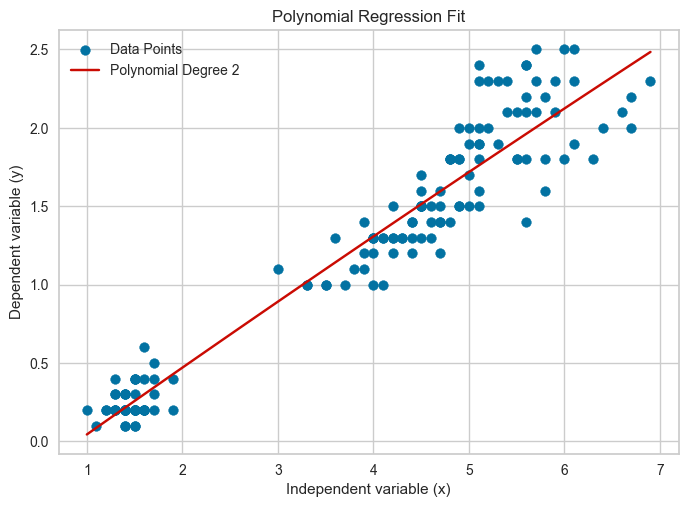

Polynomial model coefficients: [-0.00256892  0.43383349 -0.38678103]


In [61]:
# Selecting the features for regression
x = iris_data['petal length (cm)'].values
y = iris_data['petal width (cm)'].values
degree = 2

# Applying the polynomial regression function
model = polynomial_regression(x, y, degree)
print("Polynomial model coefficients:", model.coefficients)

#### Logistic regression 

In [62]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Number of features
        n_samples, n_features = X.shape
        
        # Init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.num_iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid to linear model
            y_predicted = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

##### testing with iris dataset

In [63]:
#using iris datasets
X = iris.data
y = (iris.target == 0).astype(int)  # Binary target: 1 if Iris-setosa, 0 otherwise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Logistic Regression model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


##### Decision tree Function

In [64]:
class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def _gini(self, y):
        classes = np.unique(y)
        n_samples = len(y)
        gini = 1.0
        for cls in classes:
            p_cls = np.count_nonzero(y == cls) / n_samples
            gini -= p_cls ** 2
        return gini

    def _best_split(self, X, y):
        m, n = X.shape
        best_gini = 1.0
        best_idx, best_thr = None, None
        for idx in range(n):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            for i in range(1, len(y)):
                if thresholds[i] == thresholds[i - 1]:
                    continue
                gini_left = self._gini(classes[:i])
                gini_right = self._gini(classes[i:])
                gini = (i * gini_left + (m - i) * gini_right) / m
                if gini < best_gini:
                    best_gini = gini
                    best_idx, best_thr = idx, (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= self.min_samples_split and depth <= self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                left = self._build_tree(X_left, y_left, depth + 1)
                right = self._build_tree(X_right, y_right, depth + 1)
                return DecisionTreeNode(feature_index=idx, threshold=thr, left=left, right=right)
        return DecisionTreeNode(value=np.bincount(y).argmax())

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _predict(self, inputs):
        node = self.root
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

#### testing with iris datasets

In [65]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


#### Random Forest

In [66]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class DecisionTreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, max_depth, min_samples_split=2, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.root = None

    def _gini(self, y):
        classes = np.unique(y)
        n_samples = len(y)
        gini = 1.0
        for cls in classes:
            p_cls = np.count_nonzero(y == cls) / n_samples
            gini -= p_cls ** 2
        return gini

    def _best_split(self, X, y):
        m, n = X.shape
        if self.max_features:
            features = np.random.choice(n, self.max_features, replace=False)
        else:
            features = range(n)

        best_gini = 1.0
        best_idx, best_thr = None, None
        for idx in features:
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            for i in range(1, len(y)):
                if thresholds[i] == thresholds[i - 1]:
                    continue
                gini_left = self._gini(classes[:i])
                gini_right = self._gini(classes[i:])
                gini = (i * gini_left + (m - i) * gini_right) / m
                if gini < best_gini:
                    best_gini = gini
                    best_idx, best_thr = idx, (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= self.min_samples_split and depth <= self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                left = self._build_tree(X_left, y_left, depth + 1)
                right = self._build_tree(X_right, y_right, depth + 1)
                return DecisionTreeNode(feature_index=idx, threshold=thr, left=left, right=right)
        return DecisionTreeNode(value=np.bincount(y).argmax())

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def _predict(self, inputs):
        node = self.root
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            bootstrap_idx = np.random.randint(low=0, high=len(X), size=len(X))
            X_bootstrap = X[bootstrap_idx]
            y_bootstrap = y[bootstrap_idx]
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split, max_features=self.max_features)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)  # Transpose to get predictions per sample
        majority_vote = [np.bincount(sample_preds).argmax() for sample_preds in tree_preds]
        return np.array(majority_vote)

In [67]:
##### testing on the iris dataset

In [68]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=10, max_depth=3, max_features=2)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


#### Support vector Machine (SVM)

In [69]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Convert labels to -1 and 1
        y_ = np.where(y <= 0, -1, 1)
        
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

#### testing with irsis datasets

In [70]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Let's classify Iris-setosa (0) vs Iris-versicolor (1), ignore Iris-virginica (2)
is_binary_class = (y == 0) | (y == 1)
X = X[is_binary_class]
y = y[is_binary_class]
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for SVM

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearSVM class
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)

# Predict on the test set
predictions = svm.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00
